In [0]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
import pandas as pd


import numpy as np


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link_test_csv = 'https://drive.google.com/open?id=1cLeOuhzaTLCpJyO974pGWYzL4SIaIVua'
link_train_csv = 'https://drive.google.com/open?id=1wrnwNmKeKgjigBInLW6NBIouXH4ZRl5_'
idc, id_test_csv = link_test_csv.split('=')
idc, id_train_csv = link_train_csv.split('=')

downloaded = drive.CreateFile({'id':id_test_csv}) 
downloaded.GetContentFile('equip_failures_test_set.csv')  
downloaded2 = drive.CreateFile({'id':id_train_csv})
downloaded2.GetContentFile('equip_failures_training_set.csv')


# these are our test and train dataframes
test_df = pd.read_csv('equip_failures_test_set.csv')
train_df = pd.read_csv('equip_failures_training_set.csv')

col = train_df.columns
col_test = test_df.columns

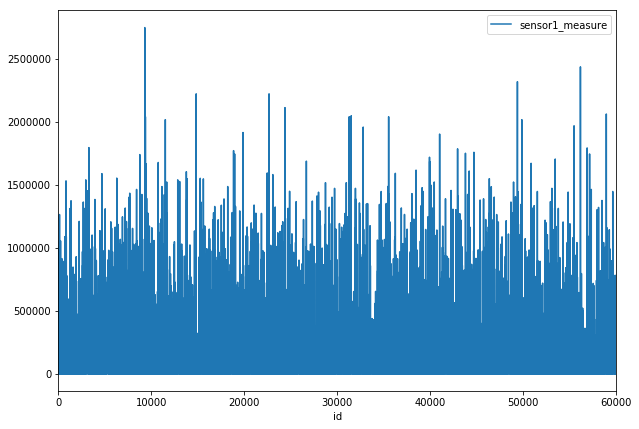

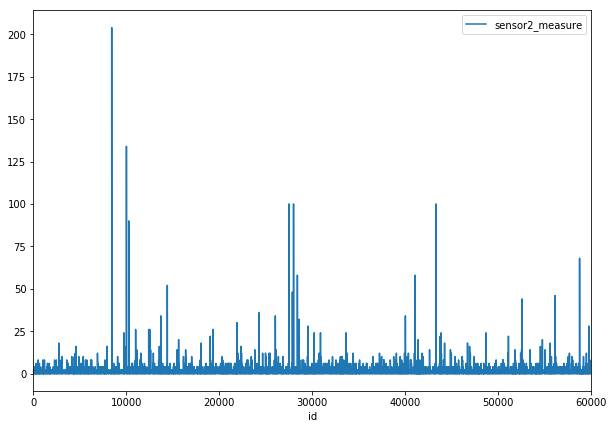

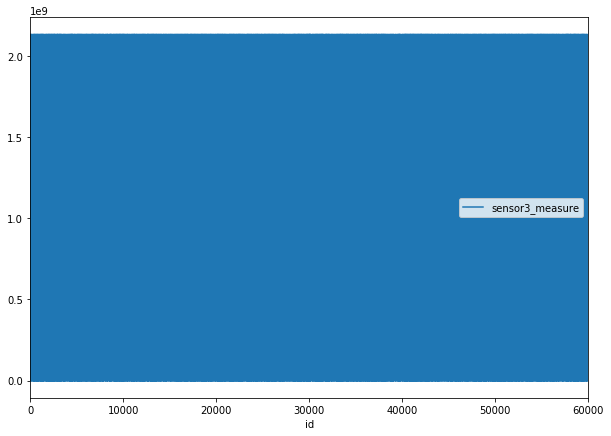

In [0]:
# https://machinelearningmastery.com/handle-missing-data-python/
from sklearn.impute import SimpleImputer

train_df = train_df.replace('na', np.nan)	
imp_mean = SimpleImputer(strategy='median')
imp_mean.fit(train_df)

imputed_train_df = imp_mean.transform(train_df)
imputed_train_df = pd.DataFrame(imputed_train_df, columns=col)

imputed_train_df.plot(x ='id', y='sensor1_measure', kind = 'line', figsize=(10,7))
imputed_train_df.plot(x ='id', y='sensor2_measure', kind = 'line', figsize=(10,7))
imputed_train_df.plot(x ='id', y='sensor3_measure', kind = 'line', figsize=(10,7))
    

test_df = test_df.replace('na', np.nan)
imp_mean_test = SimpleImputer(strategy='median')
imp_mean_test.fit(test_df)

imputed_test_df = imp_mean_test.transform(test_df)
imputed_test_df = pd.DataFrame(imputed_test_df, columns=col_test) 

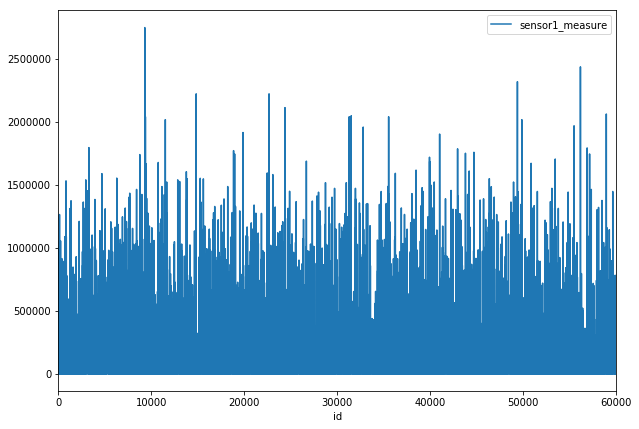

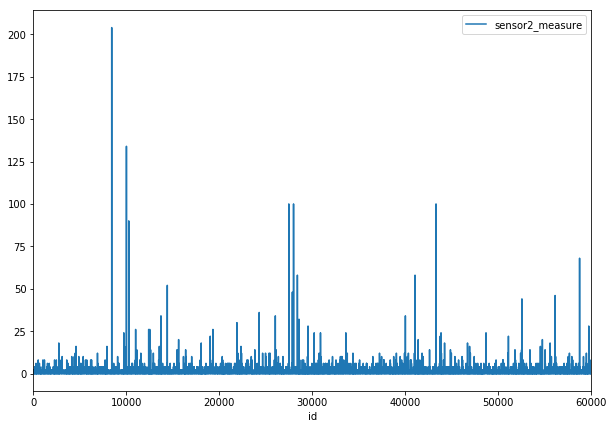

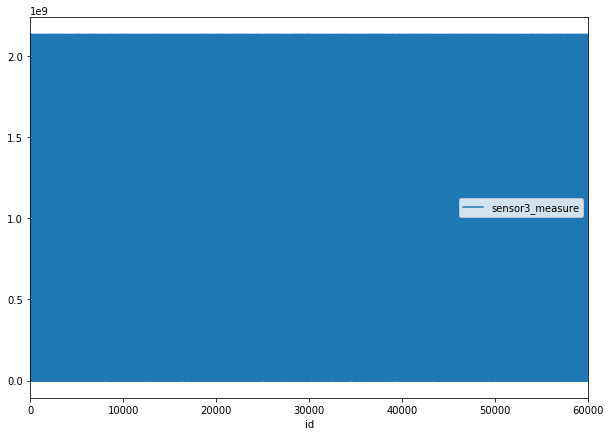

In [0]:
# https://machinelearningmastery.com/handle-missing-data-python/
from sklearn.impute import SimpleImputer

train_df = train_df.replace('na', np.nan)
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(train_df)

imputed_train_df = imp_mean.transform(train_df)
imputed_train_df = pd.DataFrame(imputed_train_df, columns=col)

imputed_train_df.plot(x ='id', y='sensor1_measure', kind = 'line', figsize=(10,7))
imputed_train_df.plot(x ='id', y='sensor2_measure', kind = 'line', figsize=(10,7))
imputed_train_df.plot(x ='id', y='sensor3_measure', kind = 'line', figsize=(10,7))

test_df = test_df.replace('na', np.nan)
imp_mean_test = SimpleImputer(strategy='mean')
imp_mean_test.fit(test_df)

imputed_test_df = imp_mean_test.transform(test_df)
imputed_test_df = pd.DataFrame(imputed_test_df, columns=col_test) 

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[15:04:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=10
[0]	eval-aucpr:0.720304	eval-map:0.725073	eval-rmse:0.381355	train-aucpr:0.878966	train-map:0.881599	train-rmse:0.380006
[15:04:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=10
[1]	eval-aucpr:0.77275	eval-map:0.775304	eval-rmse:0.296128	train-aucpr:0.923998	train-map:0.925077	train-rmse:0.29317
[15:04:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=10
[2]	eval-aucpr:0.7905	eval-map:0.789462	eval-rmse:0.23336	train-aucpr:0.937833	train-map:0.93891	train-rmse:0.228303
[15:04:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=10
[3]	eval-aucpr:0.785553	eval-map:0.782172	eval-rmse:0.187232	train-aucpr:0.943572	train-map:0.944709	train-rmse:0.17941

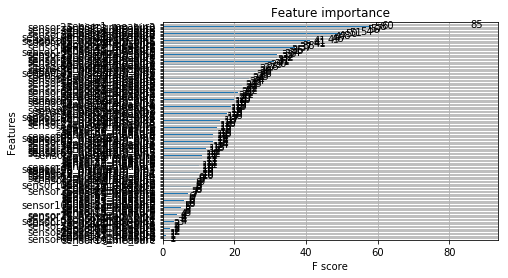

In [0]:
import xgboost as xgb
#dtrain = xgb.DMatrix(imputed_train_df.iloc[0:300, 2:], label=imputed_train_df['target'])
#dtest = xgb.DMatrix(imputed_test_df.iloc[0:300, 2:], label=imputed_test_df['target'])

from sklearn.model_selection import train_test_split

trainSet, validationSet = train_test_split(imputed_train_df, test_size=0.5)

dtrain = xgb.DMatrix(trainSet.iloc[:, 2:], label=trainSet['target'])
dtest = xgb.DMatrix(validationSet.iloc[:, 2:], label=validationSet['target'])
true_test = xgb.DMatrix(imputed_test_df.iloc[:, 1:])

param = {'max_depth':10, 'eta':0.25, 'verbosity':2, 'objective':'binary:logistic', 'alpha':0.5}
param['nthread'] = 6
param['eval_metric'] = ['aucpr', 'map', 'rmse']

num_rounds = 100

evallist = [(dtest, 'eval'), (dtrain, 'train')]


model = xgb.train(param, dtrain, num_rounds, evallist)
prediction = model.predict(true_test)

np.set_printoptions(threshold=1000)
print(prediction)
print("Mean of predictions: " + str(np.mean(prediction)))
print("Median of predicitons: " + str(np.median(prediction)))

xgb.plot_importance(model)
xgb.to_graphviz(model)

# plt.style.use('classic')
# x = np.linspace(0, 10, 30)
# y = prediction

# plt.plot(x, y, 'o', color='black')


for count in range(len(prediction)):
    if(prediction[count] > .5):
      prediction[count] = 1
    else:
      prediction[count] = 0




/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[14:57:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[0]	eval-aucpr:0.684045	eval-map:0.681509	eval-rmse:0.404509	train-aucpr:0.856179	train-map:0.857459	train-rmse:0.403592
[14:57:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=7
[1]	eval-aucpr:0.736986	eval-map:0.737901	eval-rmse:0.330587	train-aucpr:0.897352	train-map:0.89788	train-rmse:0.328669
[14:57:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[2]	eval-aucpr:0.754919	eval-map:0.755119	eval-rmse:0.272386	train-aucpr:0.904267	train-map:0.904925	train-rmse:0.269429
[14:57:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[3]	eval-aucpr:0.76205	eval-map:0.762553	eval-rmse:0.226609	train-aucpr:0.916254	train-map:0.916381	train-rmse:0.222211
[1

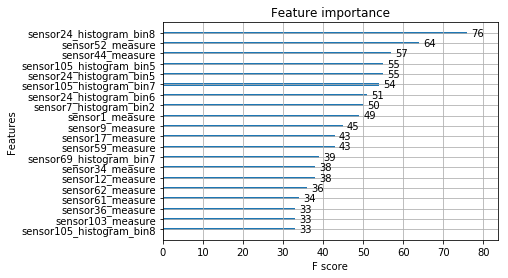

In [0]:
import xgboost as xgb
#dtrain = xgb.DMatrix(imputed_train_df.iloc[0:300, 2:], label=imputed_train_df['target'])
#dtest = xgb.DMatrix(imputed_test_df.iloc[0:300, 2:], label=imputed_test_df['target'])

from sklearn.model_selection import train_test_split

trainSet, validationSet = train_test_split(imputed_train_df, test_size=0.5)

dtrain = xgb.DMatrix(trainSet.iloc[:, 2:], label=trainSet['target'])
dtest = xgb.DMatrix(validationSet.iloc[:, 2:], label=validationSet['target'])
true_test = xgb.DMatrix(imputed_test_df.iloc[:, 1:])

param = {'max_depth':7, 'eta':0.2, 'verbosity':2, 'objective':'binary:logistic', 'alpha':0.5}
param['nthread'] = 6
param['eval_metric'] = ['aucpr', 'map', 'rmse']

num_rounds = 100

evallist = [(dtest, 'eval'), (dtrain, 'train')]


model = xgb.train(param, dtrain, num_rounds, evallist)
prediction = model.predict(true_test)

np.set_printoptions(threshold=1000)
print(prediction)
print("Mean of predictions: " + str(np.mean(prediction)))
print("Median of predicitons: " + str(np.median(prediction)))
print("FSCORE: " +str(model.get_fscore()))
xgb.plot_importance(model, max_num_features=20)
#xgb.to_graphviz(model)
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.style.use('classic')
# x = np.linspace(0, 10, 30)
# y = prediction

# plt.plot(x, y, 'o', color='black')


for count in range(len(prediction)):
    if(prediction[count] > .5):
      prediction[count] = 1
    else:
      prediction[count] = 0




In [0]:
import csv

model.save_model('0001.model')
count = 1
filewriter = csv.writer(open("predictions.csv", "w"))
filewriter.writerow(["id", "target"])
for item in prediction:
  filewriter.writerow([count, int(item)])
  count+=1

print(count)

16002


In [0]:
# Create & upload a file.
uploaded = drive.CreateFile({'output_tamu': 'predictions.csv'})
uploaded.SetContentFile('predictions.csv')
uploaded.Upload()
print('Uploaded csv with ID {}'.format(uploaded.get('id')))
model.save_model('0001.model')
uploaded = drive.CreateFile({'model': '0001.model'})
uploaded.SetContentFile('0001.model')
uploaded.Upload()
print('Uploaded model with ID {}'.format(uploaded.get('id')))


Uploaded csv with ID 1sofkdsenTidYpX3e1V8ikgRpbcQjPSYD
Uploaded model with ID 1OqPJGo31o7hrVN11Y-kf-N-obV375C0U
